## **Additional Data Preparation Techniques**

- **Feature Scaling:** Standardizing/normalizing the data.
- **Resampling:** Changing the frequency of your time series (e.g., from daily to monthly data).
- **Smoothing:** Reducing noise in the data to reveal underlying patterns.
- **Feature Engineering:** Creating new features that might be predictive (e.g., lag variables, rolling statistics).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## Using the `tsfresh` Library 
tsfresh is a Python package that automatically calculates a large number of time series features. It is primarily designed to work with pandas DataFrames. The package is able to calculate a large number of time series characteristics, such as the number of peaks, the average or maximal value, the time of the maximal value, etc.

## Using financial stock market data

In [12]:
# Get Meta stock price data 

meta = yf.Ticker("META")
data = meta.history(period="max")
data = data[['Close']]
data.head

<bound method NDFrame.head of                                 Close
Date                                 
2012-05-18 00:00:00-04:00   38.151604
2012-05-21 00:00:00-04:00   33.960213
2012-05-22 00:00:00-04:00   30.936428
2012-05-23 00:00:00-04:00   31.934378
2012-05-24 00:00:00-04:00   32.962265
...                               ...
2024-07-25 00:00:00-04:00  453.410004
2024-07-26 00:00:00-04:00  465.700012
2024-07-29 00:00:00-04:00  465.709991
2024-07-30 00:00:00-04:00  463.190002
2024-07-31 00:00:00-04:00  474.829987

[3069 rows x 1 columns]>

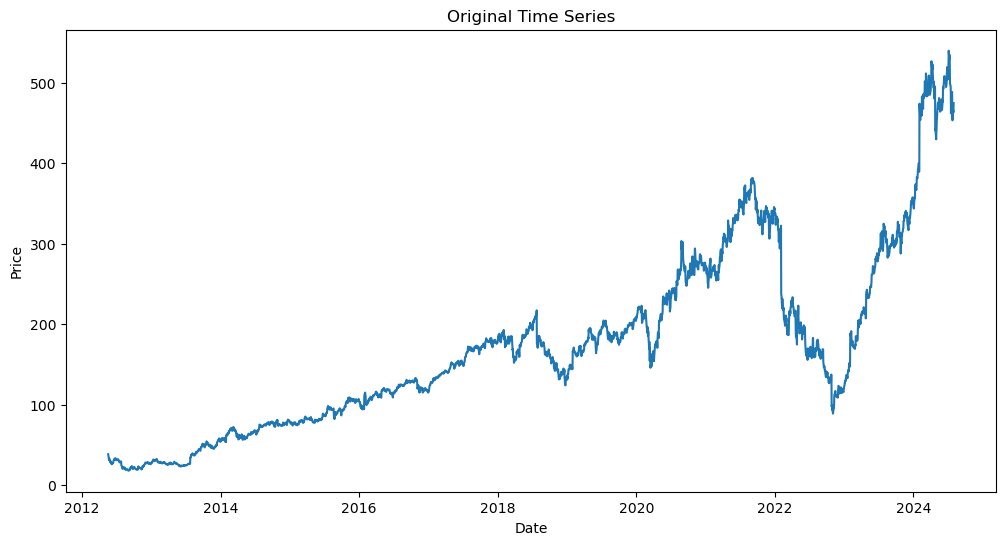

In [13]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Feature Scaling**

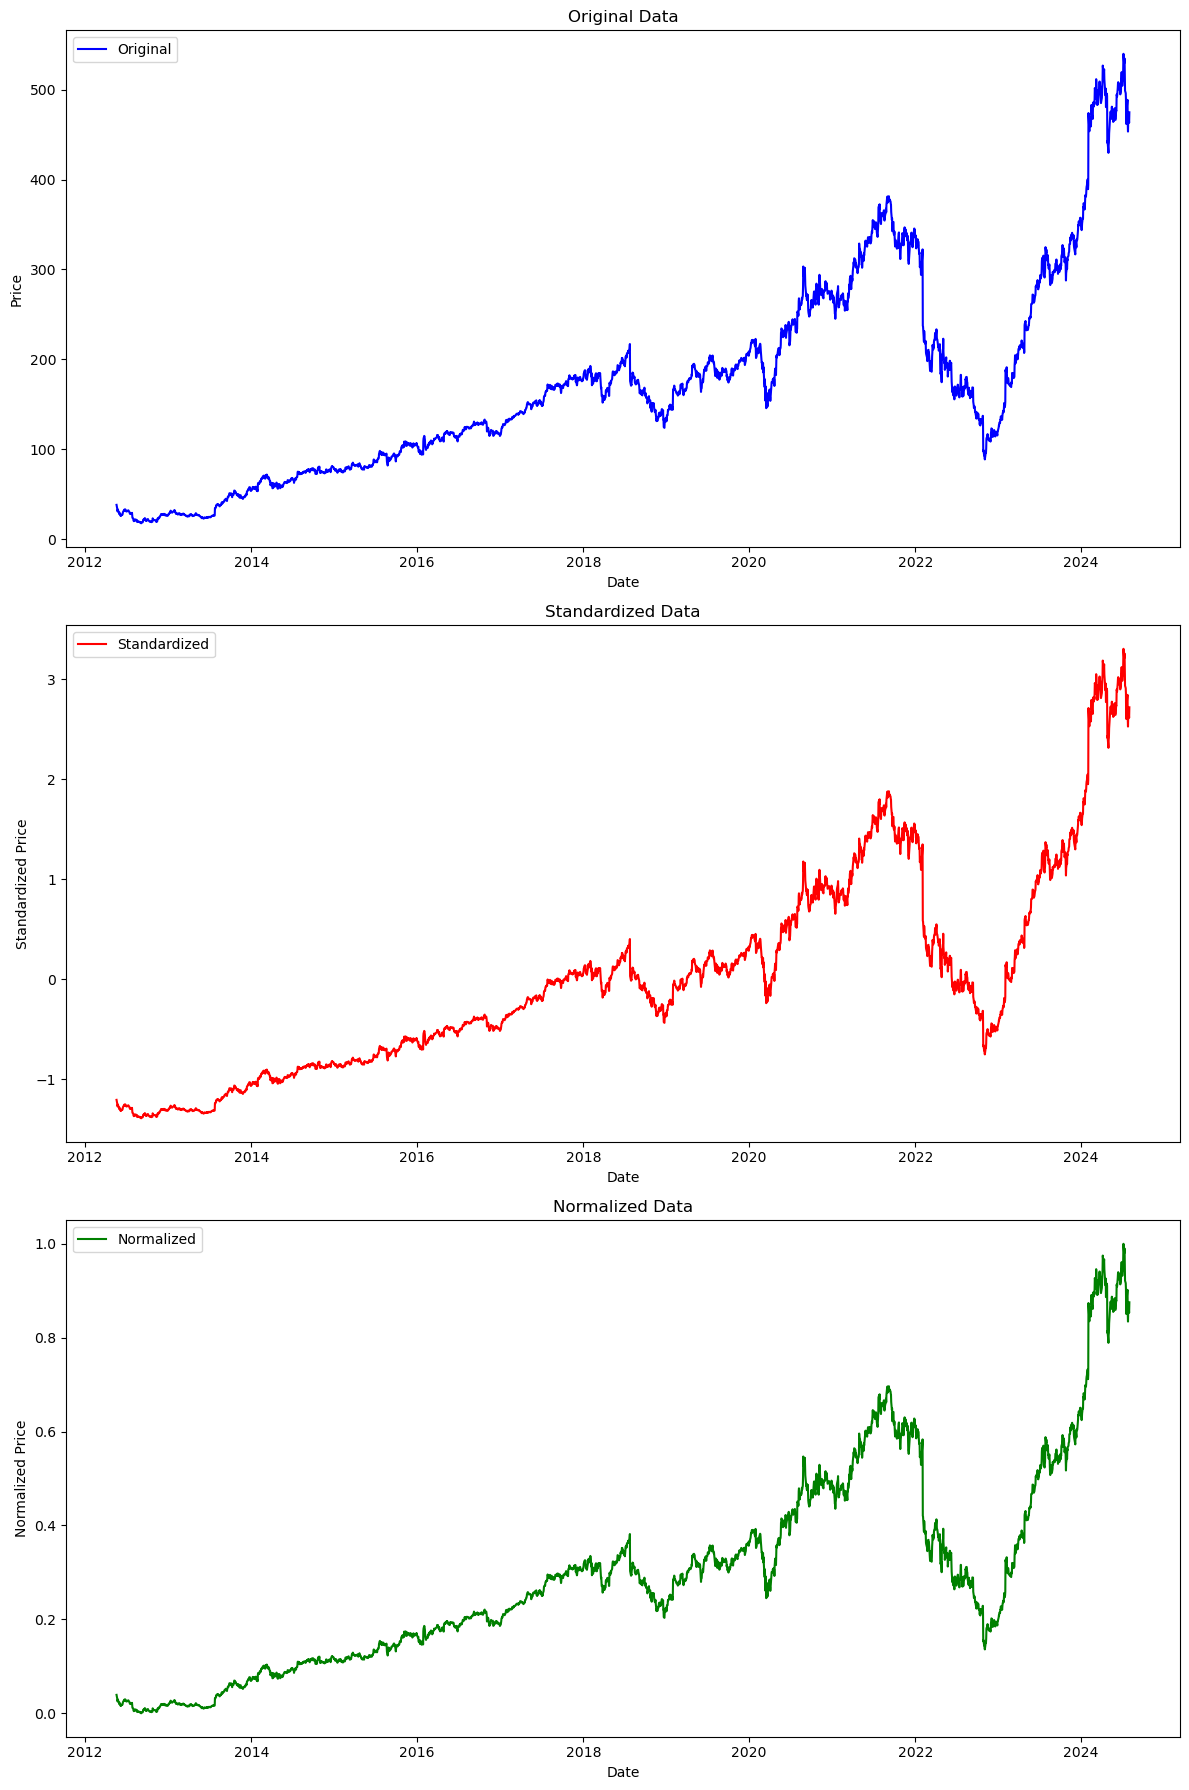


Original Data Statistics:
count    3069.000000
mean      172.235588
std       111.203745
min        17.693640
25%        82.839775
50%       161.957184
75%       221.035782
max       539.909973
Name: Close, dtype: float64

Standardized Data Statistics:
count    3.069000e+03
mean     1.481744e-16
std      1.000163e+00
min     -1.389945e+00
25%     -8.040231e-01
50%     -9.244364e-02
75%      4.389074e-01
max      3.306852e+00
Name: Close, dtype: float64

Normalized Data Statistics:
count    3069.000000
mean        0.295935
std         0.212946
min         0.000000
25%         0.124749
50%         0.276252
75%         0.389383
max         1.000000
Name: Close, dtype: float64


In [16]:
# 4. Feature Scaling
# Prepare data for scaling (remove non-numeric columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
data_standardized = pd.DataFrame(scaler_standard.fit_transform(data_numeric), 
                                 columns=numeric_columns, 
                                 index=data_numeric.index)

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
data_normalized = pd.DataFrame(scaler_minmax.fit_transform(data_numeric), 
                               columns=numeric_columns, 
                               index=data_numeric.index)

# Advanced Time Series Data Preparation Techniques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

 
# Plotting original vs scaled data for the 'Close' column
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Original Data
axs[0].plot(data['Close'], label='Original', color='blue')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

# Standardized Data
axs[1].plot(data_standardized['Close'], label='Standardized', color='red')
axs[1].set_title('Standardized Data')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Standardized Price')
axs[1].legend()

# Normalized Data
axs[2].plot(data_normalized['Close'], label='Normalized', color='green')
axs[2].set_title('Normalized Data')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Normalized Price')
axs[2].legend()

plt.tight_layout()
plt.show()

print("\nOriginal Data Statistics:")
print(data['Close'].describe())

print("\nStandardized Data Statistics:")
print(data_standardized['Close'].describe())

print("\nNormalized Data Statistics:")
print(data_normalized['Close'].describe())

**Original Data:**
   - Shows the raw stock price over time, ranging from about $25 to over $500.
   - We see a general upward trend with significant volatility, especially in recent years.
   - There's a notable drop around 2022 followed by a sharp recovery.

**Business Insight:** This represents the actual market valuation and is directly relevant for financial reporting and understanding absolute price levels.

**Standardized Data:**
   - The y-axis now ranges from about -1.5 to 3, representing standard deviations from the mean.
   - The shape of the graph is identical to the original, but the scale has changed.
   - Most data points fall between -2 and +2 standard deviations.

**Business Insights:**
   - Values above 0 indicate prices higher than the historical average.
   - The recent peak (around 3) shows the stock price is extraordinarily high compared to its historical performance.
   - This scaling makes it easier to identify outlier periods and compare performance across different time frames.

**Normalized Data:**
   - The y-axis now ranges from 0 to 1, representing the minimum and maximum prices respectively.
   - Again, the shape is identical, but now we can easily see relative positions within the stock's historical range.

**Business Insights:**
   - The current price level (around 0.8-0.9) indicates the stock is trading near its all-time highs.
   - The low point in 2022 (about 0.2) shows how significant that drop was relative to the stock's historical performance.
   - This scaling is particularly useful for understanding the current price in the context of the stock's entire trading history.

 

## **Resampling**

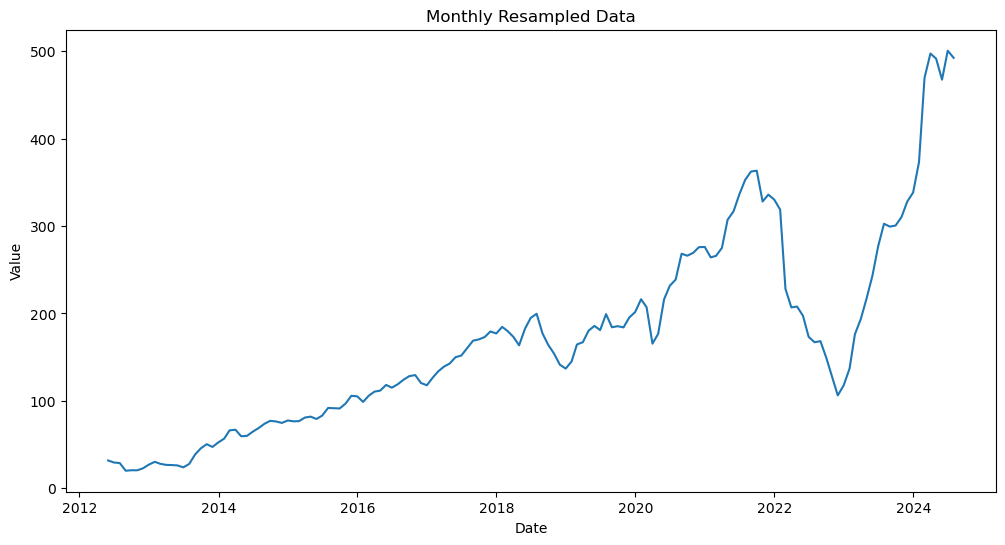

Original data shape: (3069, 1)
Monthly resampled data shape: (147, 1)


In [17]:
# 1. Resampling
# Resample to monthly frequency
monthly_data = data.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title('Monthly Resampled Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

print("Original data shape:", data.shape)
print("Monthly resampled data shape:", monthly_data.shape)

## **Smoothing**

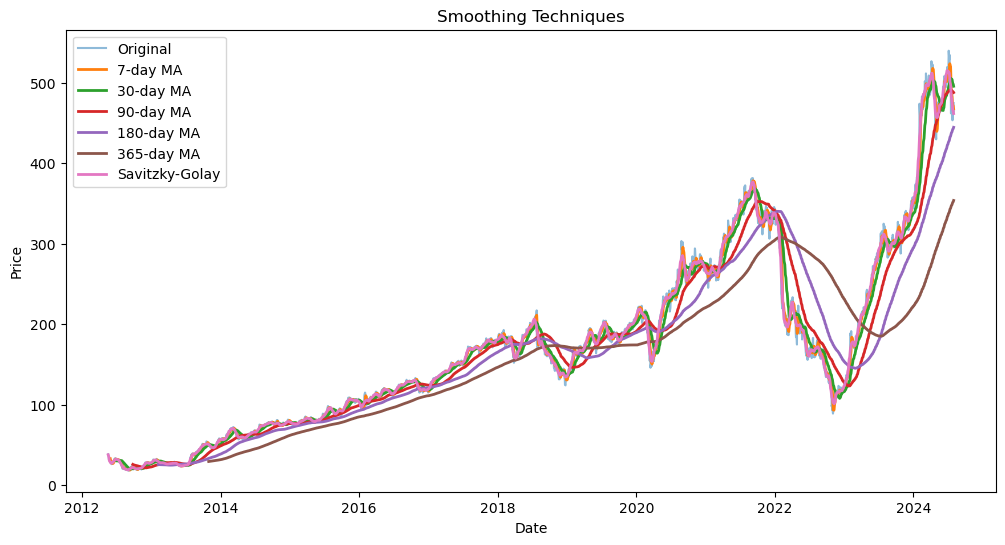

In [20]:
# Using moving average
ma_7 = data.rolling(window=7).mean()
ma_30 = data.rolling(window=30).mean()
ma_90 = data.rolling(window=90).mean()
ma_180 = data.rolling(window=180).mean()
ma_365 = data.rolling(window=365).mean()

# Using Savitzky-Golay filter
# Adjust window_length to be odd and less than the size of your data
window_length = min(31, len(data) - 1)
if window_length % 2 == 0:
    window_length -= 1
sg_filter = savgol_filter(data['Close'].values, window_length=window_length, polyorder=3)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Original', alpha=0.5)
plt.plot(data.index, ma_7, label='7-day MA', linewidth=2)
plt.plot(data.index, ma_30, label='30-day MA', linewidth=2)
plt.plot(data.index, ma_90, label='90-day MA', linewidth=2)
plt.plot(data.index, ma_180, label='180-day MA', linewidth=2)
plt.plot(data.index, ma_365, label='365-day MA', linewidth=2)
plt.plot(data.index, sg_filter, label='Savitzky-Golay', linewidth=2)
plt.title('Smoothing Techniques')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


1. **Original Data (Blue):**
   - Shows the raw stock price with all its daily fluctuations.
   - Provides the most detailed view but can be noisy.

2. **7-day Moving Average (Orange):**
   - Smooths out very short-term fluctuations.
   - Closely follows the original data, capturing short-term trends.
   - Useful for: Weekly operational decisions, short-term trading strategies.

3. **30-day Moving Average (Green):**
   - Smooths out more noise, showing clearer short to medium-term trends.
   - Useful for: Monthly strategic reviews, identifying medium-term market sentiment.

4. **90-day Moving Average (Red):**
   - Provides a clearer picture of quarterly trends.
   - Useful for: Quarterly business planning, identifying more significant market shifts.

5. **180-day Moving Average (Purple):**
   - Shows half-yearly trends, smoothing out most short-term volatility.
   - Useful for: Mid-term strategic planning, identifying sustained market movements.

6. **365-day Moving Average (Brown):**
   - Represents the annual trend, showing the most smoothed line.
   - Useful for: Long-term strategic decisions, understanding overall market direction.

7. **Savitzky-Golay Filter (Pink):**
   - Provides smoothing while preserving higher-order moments (peaks and valleys).
   - Balances noise reduction with trend preservation.
   - Useful for: Technical analysis, identifying potential turning points.

## **Feature Engineering**

In [23]:
# 3. Feature Engineering
# Create lag features
for i in [1, 7, 30]:
    data[f'lag_{i}'] = data['Close'].shift(i)

# Create rolling statistics
for window in [7, 30]:
    data[f'rolling_mean_{window}'] = data['Close'].rolling(window=window).mean()
    data[f'rolling_std_{window}'] = data['Close'].rolling(window=window).std()

# Create seasonal features
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['quarter'] = data.index.quarter

print("\nFeature Engineered Data:")
print(data.head())



Feature Engineered Data:
                               Close      lag_1  lag_7  lag_30  \
Date                                                             
2012-05-18 00:00:00-04:00  38.151604        NaN    NaN     NaN   
2012-05-21 00:00:00-04:00  33.960213  38.151604    NaN     NaN   
2012-05-22 00:00:00-04:00  30.936428  33.960213    NaN     NaN   
2012-05-23 00:00:00-04:00  31.934378  30.936428    NaN     NaN   
2012-05-24 00:00:00-04:00  32.962265  31.934378    NaN     NaN   

                           rolling_mean_7  rolling_std_7  rolling_mean_30  \
Date                                                                        
2012-05-18 00:00:00-04:00             NaN            NaN              NaN   
2012-05-21 00:00:00-04:00             NaN            NaN              NaN   
2012-05-22 00:00:00-04:00             NaN            NaN              NaN   
2012-05-23 00:00:00-04:00             NaN            NaN              NaN   
2012-05-24 00:00:00-04:00             NaN        

## **Correlations** 

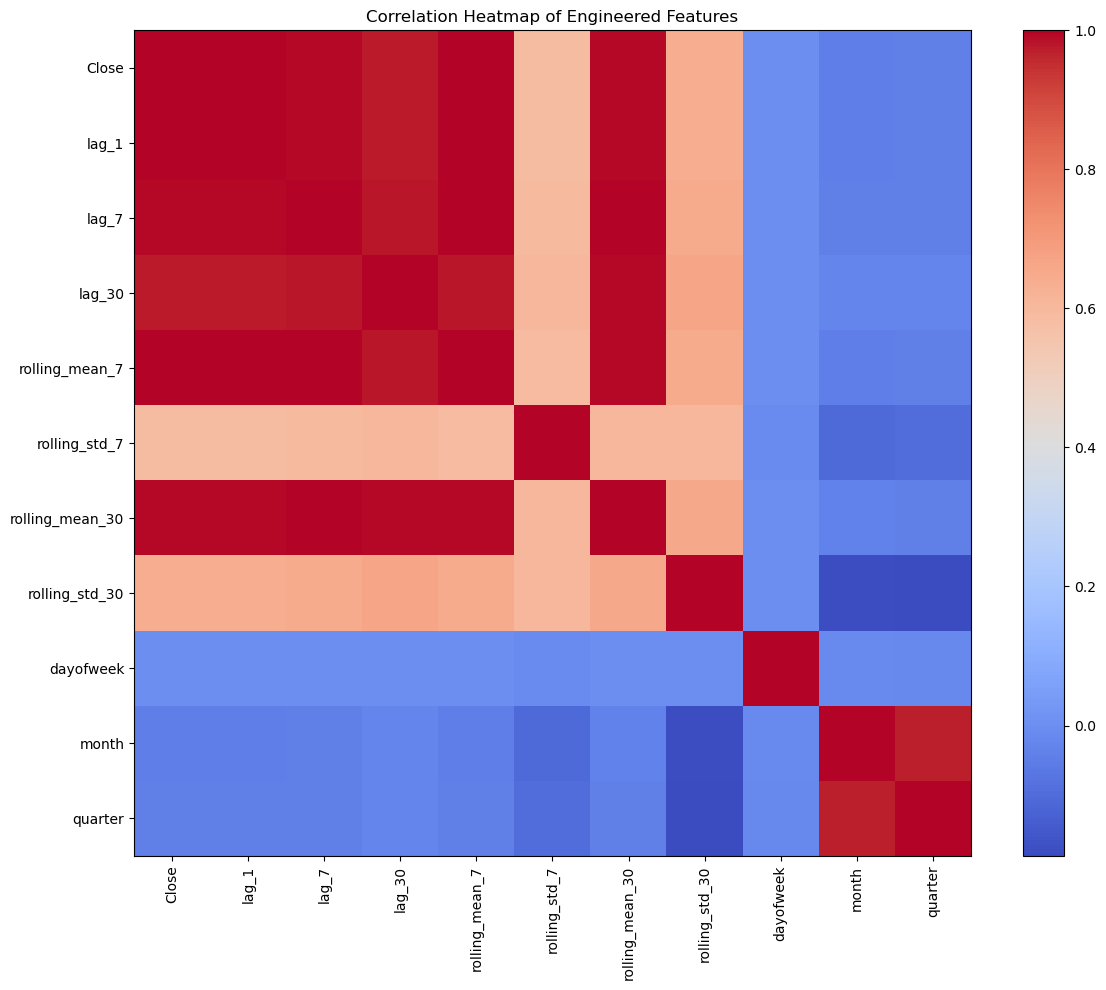

In [24]:
# Correlation heatmap of engineered features
correlation = data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Heatmap of Engineered Features')
plt.tight_layout()
plt.show()


1. **High Positive Correlations (Dark Red):**
   - Close price is highly correlated with lag_1, lag_7, lag_30, and rolling means.
   - Insight: Recent past prices and averages are strong indicators of current price.
   - Business Implication: Short to medium-term price trends are relatively stable, useful for short-term forecasting and decision-making.

2. **Moderate Positive Correlations (Light Red):**
   - Rolling standard deviations show moderate correlation with price and lags.
   - Insight: Volatility tends to increase with price increases.
   - Business Implication: Higher prices may come with higher risk, important for risk management strategies.

3. **Low Correlations (White to Light Blue):**
   - Day of week, month, and quarter show low correlation with price.
   - Insight: Calendar features have limited direct impact on price.
   - Business Implication: Seasonal effects might be subtle or require more complex analysis to uncover.

4. **Negative Correlations (Dark Blue):**
   - Few negative correlations are visible, mainly between calendar features and price-based features.
   - Insight: Some weak inverse relationships between time periods and price movements.
   - Business Implication: Certain time periods might slightly correspond to lower prices, but the effect is not strong.

5. **Feature Group Correlations:**
   - Lag features (lag_1, lag_7, lag_30) are highly correlated with each other.
   - Rolling means are highly correlated with each other and with lags.
   - Rolling standard deviations show moderate correlation with each other.
   - Insight: These feature groups capture similar information at different time scales.
   - Business Implication: Redundancy in features, opportunity for feature selection to simplify models.

6. **Time-based Features:**
   - Day of week, month, and quarter show high correlation among themselves but low correlation with price-based features.
   - Insight: Time-based patterns exist but don't directly correspond to price movements.
   - Business Implication: Complex seasonal patterns might exist that require more sophisticated analysis to leverage.
ical models, potentially leading to more robust and interpretable business intelligence tools.